# Basic Example 

In [1]:
import sparkle
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[2021_09_25_22_15_09] (rospy.topics) INFO: topicmanager initialized
[2021_09_25_22_15_10] (gnupg) INFO: Log opened: Sun Sep 26 05:15:10 2021 UTC


/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/bagpy-0.4.4-py3.7.egg/bagpy/bagreader.py:127: UserWarning: There is a newer version of bagpy available on PyPI:

Your version: 	
0.4.4
Latest version: 	
0.4.6
Consider updating it by using command pip install --upgrade bagpy
  "Consider updating it by using command pip install --upgrade bagpy"


In [2]:
sparkle.__version__

'0.1.0'

In [3]:
from sparkle import layout

## Create a simple layout with 4 vehicles

In [4]:
n_vehicles = 4
X = [60.0, 40.0, 20.0, 0.0] # X-coordinates of the vehicle
Y = [0.0, 0.0,  0.0,  0.0] # Y-coordinates of the vehicle
Yaw = [0.0, 0.0, 0.0, 0.0] # Yaw of the vehicle
max_update_rate = 50.0
time_step = 0.01
update_rate = 10.0
log_time = 90.0
description = 'A very basic layout testing with 4 cars'
logdir = '/home/refulgent/Cyverse/sparkle/'

L = layout(n_vehicles=n_vehicles, X=X, Y=Y, Yaw=Yaw, max_update_rate = max_update_rate,
          time_step= time_step, update_rate = update_rate, log_time = log_time, description = description, 
          logdir = logdir)

[2021_09_25_22_15_13] (root) INFO: Creating simulation layout ...


In [5]:
L.__class__.__name__

'layout'

## Start roscore

In [6]:
L.roscore()

You can also check if roscore is running


In [7]:
L.checkroscore()

True

## Load an initial world

In [8]:
L.create(initial_world = '/home/refulgent/catvehicle_ws/src/sparkle/launch/threelanes.launch')

... logging to /home/refulgent/.ros/log/bb8a4eae-1e88-11ec-865a-4ba88e7e3237/roslaunch-refulgent-68200.log
{'logdata': False, 'roscore': True, 'physics_engine': False, 'rviz': False, 'control': False, 'spawn': False}
bb8a4eae-1e88-11ec-865a-4ba88e7e3237
... logging to /home/refulgent/.ros/log/bb8a4eae-1e88-11ec-865a-4ba88e7e3237/roslaunch-refulgent-68200.log
started roslaunch server http://refulgent.local:34775/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /gazebo/enable_ros_network: True
 * /rosdistro: noetic
 * /rosversion: 1.15.11
 * /use_sim_time: True

NODES
  /
    gazebo (gazebo_ros/gzserver)

ROS_MASTER_URI=http://localhost:11311
process[gazebo-1]: started with pid [68444]
/home/refulgent/catvehicle_ws/src/sparkle/launch/threelanes.launch started.
Max Update Rate was not set properly, terminating simulation. Please restart the simulation.
New  max_update_rate is 50.0


## Spawn all vehicles and start logging data

In [9]:
L.spawn(include_laser="all")
L.logdata(logdir = logdir, log_time = log_time)

17920894-12dc-11ec-96ad-13295a03a9e2
... logging to /home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/roslaunch-refulgent-44577.log
17920894-12dc-11ec-96ad-13295a03a9e2
... logging to /home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/roslaunch-refulgent-44577.log
17920894-12dc-11ec-96ad-13295a03a9e2
... logging to /home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/roslaunch-refulgent-44577.log
17920894-12dc-11ec-96ad-13295a03a9e2
... logging to /home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/roslaunch-refulgent-44577.log
started roslaunch server http://refulgent.local:41991/

SUMMARY

PARAMETERS
 * /rosdistro: noetic
 * /rosversion: 1.15.11
 * /sparkle_000/childFrameId: sparkle_000/base_...
 * /sparkle_000/headerFrameId: sparkle_000/odom
 * /sparkle_000/model_state_sparkle_000/enablePos: True
 * /sparkle_000/model_state_sparkle_000/enableTwist: True
 * /sparkle_000/psi_init: 0.0
 * /sparkle_000/robot_description: <?xml version="1....
 * 

[2021_09_11_01_42_34] (rospy.internal) INFO: topic[/rosout] adding connection to [/bagrecorder], count 1
[2021_09_11_01_42_37] (root) INFO: Gzstat file recorded being recorded is at [/home/refulgent/Cyverse/sparkle/gzstats_2021-09-11-01-42-37-604891.txt]


## Send control command for specified duration and then exit

In [10]:
L.control(control_method = ['launch', 'rl', 'rl', 'rl'])
time.sleep(log_time)
L.destroy()

[2021_09_11_01_42_49] (root) INFO: Route is lane
17920894-12dc-11ec-96ad-13295a03a9e2
... logging to /home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/roslaunch-refulgent-44577.log
17920894-12dc-11ec-96ad-13295a03a9e2
... logging to /home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/roslaunch-refulgent-44577.log
17920894-12dc-11ec-96ad-13295a03a9e2
... logging to /home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/roslaunch-refulgent-44577.log
17920894-12dc-11ec-96ad-13295a03a9e2
... logging to /home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/roslaunch-refulgent-44577.log
Number of vehicles:4
Number of launch control objects: 4
started roslaunch server http://refulgent.local:33741/

SUMMARY

PARAMETERS
 * /HEADWAY_SCALE: 1.0
 * /SPEED_SCALE: 1.0
 * /T: 0.6
 * /ego_vel_topic: /sparkle_001/vel
 * /headway_topic: /sparkle_001/lead...
 * /mode: prompt
 * /model: /home/refulgent/c...
 * /relative_vel_topic: /sparkle_001/rel_vel
 * /rosdistro: no

[2021_09_11_01_44_46] (roslaunch) INFO: [sparkle_000/global_frame_tf_sparkle_000-3] killing on exit
[2021_09_11_01_44_46] (roslaunch) INFO: [sparkle_000/odom2path_sparkle_000-7] killing on exit
[2021_09_11_01_44_46] (roslaunch) INFO: [sparkle_000/bicycle_sparkle_000-5] killing on exit
[2021_09_11_01_44_46] (roslaunch) INFO: [sparkle_000/model_state_sparkle_000-6] killing on exit
[2021_09_11_01_44_46] (roslaunch) INFO: [sparkle_000/transform_sparkle_sparkle_000-4] killing on exit
[2021_09_11_01_44_46] (roslaunch) INFO: [sparkle_000/global_frame_tf_sparkle_000-3] killing on exit
[2021_09_11_01_44_46] (roslaunch) INFO: [sparkle_000/odom2path_sparkle_000-7] killing on exit
[2021_09_11_01_44_46] (roslaunch) INFO: [sparkle_000/bicycle_sparkle_000-5] killing on exit
[2021_09_11_01_44_46] (roslaunch) INFO: [sparkle_000/model_state_sparkle_000-6] killing on exit
[2021_09_11_01_44_46] (roslaunch) INFO: [sparkle_000/transform_sparkle_sparkle_000-4] killing on exit
[2021_09_11_01_44_46] (roslaunch

[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/followerstopperth4rl_node-27] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001_rlcontroller-26] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/followerstopperth4rl_node-27] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001_rlcontroller-26] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/followerstopperth4rl_node-27] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001_rlcontroller-26] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/followerstopperth4rl_node-27] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001_rlcontroller-26] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/followerstopperth4rl_node-27] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001_rlcontroller-26] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/followerstopperth4rl_n

[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/odom2path_sparkle_001-13] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/transform_sparkle_sparkle_001-10] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/global_frame_tf_sparkle_001-9] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/model_state_sparkle_001-12] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/bicycle_sparkle_001-11] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/odom2path_sparkle_001-13] killing on exit
[sparkle_001/odom2path_sparkle_001-13] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/transform_sparkle_sparkle_001-10] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/global_frame_tf_sparkle_001-9] killing on exit
[2021_09_11_01_44_47] (roslaunch) INFO: [sparkle_001/model_state_sparkle_001-12] killing on exit
[sparkle_001/model_state_sparkle_001-12] killing on exit
[2021

[2021_09_11_01_44_49] (roslaunch.pmon) INFO: ProcessMonitor.shutdown <ProcessMonitor(ProcessMonitor-4, started daemon 140641862399744)>
[2021_09_11_01_44_49] (roslaunch.pmon) INFO: ProcessMonitor._post_run <ProcessMonitor(ProcessMonitor-4, started daemon 140641862399744)>
[2021_09_11_01_44_49] (roslaunch.pmon) INFO: ProcessMonitor._post_run <ProcessMonitor(ProcessMonitor-4, started daemon 140641862399744)>: remaining procs are [<roslaunch.nodeprocess.LocalProcess object at 0x7fe9cb9c58d0>, <roslaunch.nodeprocess.LocalProcess object at 0x7fe9cb9cba10>, <roslaunch.nodeprocess.LocalProcess object at 0x7fe9cb9ce8d0>, <roslaunch.nodeprocess.LocalProcess object at 0x7fe9cb9d1790>, <roslaunch.nodeprocess.LocalProcess object at 0x7fe9cb9d4550>]
[2021_09_11_01_44_49] (roslaunch.pmon) INFO: ProcessMonitor exit: killing sparkle_002/odom2path_sparkle_002-19
[2021_09_11_01_44_49] (roslaunch.pmon) INFO: ProcessMonitor exit: killing sparkle_002/model_state_sparkle_002-18
[2021_09_11_01_44_49] (roslau

[2021_09_11_01_44_49] (roslaunch) INFO: process[sparkle_002/bicycle_sparkle_002-17]: SIGINT killed with return value 0
[2021_09_11_01_44_49] (roslaunch) INFO: process[sparkle_002/model_state_sparkle_002-18]: SIGINT killed with return value 0
[2021_09_11_01_44_49] (roslaunch) INFO: process[sparkle_002/global_frame_tf_sparkle_002-15]: SIGINT killed with return value 0
[2021_09_11_01_44_49] (roslaunch) INFO: process[sparkle_002/transform_sparkle_sparkle_002-16]: SIGINT killed with return value 0
[2021_09_11_01_44_50] (roslaunch) INFO: process[sparkle_002/odom2path_sparkle_002-19]: SIGINT killed with return value 1
[2021_09_11_01_44_50] (roslaunch.pmon) INFO: ProcessMonitor exit: cleaning up data structures and signals
[2021_09_11_01_44_50] (roslaunch.pmon) INFO: ProcessMonitor exit: pmon has shutdown
/home/refulgent/catvehicle_ws/src/sparkle/launch/spawn.launch Terminated.
[2021_09_11_01_44_50] (roslaunch.pmon) INFO: ProcessMonitor.shutdown <ProcessMonitor(ProcessMonitor-8, started daemon

[2021_09_11_01_44_51] (roslaunch) INFO: [sparkle_003/odom2path_sparkle_003-25] killing on exit
[2021_09_11_01_44_51] (roslaunch) INFO: [sparkle_003/model_state_sparkle_003-24] killing on exit
[2021_09_11_01_44_51] (roslaunch) INFO: [sparkle_003/bicycle_sparkle_003-23] killing on exit
[2021_09_11_01_44_51] (roslaunch) INFO: [sparkle_003/transform_sparkle_sparkle_003-22] killing on exit
[2021_09_11_01_44_51] (roslaunch) INFO: [sparkle_003/global_frame_tf_sparkle_003-21] killing on exit
[2021_09_11_01_44_51] (roslaunch) INFO: [sparkle_003/odom2path_sparkle_003-25] killing on exit
[2021_09_11_01_44_51] (roslaunch) INFO: [sparkle_003/model_state_sparkle_003-24] killing on exit
[2021_09_11_01_44_51] (roslaunch) INFO: [sparkle_003/bicycle_sparkle_003-23] killing on exit
[2021_09_11_01_44_51] (roslaunch) INFO: [sparkle_003/transform_sparkle_sparkle_003-22] killing on exit
[2021_09_11_01_44_51] (roslaunch) INFO: [sparkle_003/global_frame_tf_sparkle_003-21] killing on exit
[2021_09_11_01_44_51] 

[2021_09_11_01_44_52] (roslaunch) ERROR: [gazebo-1] process has died [pid 44797, exit code -15, cmd /opt/ros/noetic/lib/gazebo_ros/gzserver --verbose -e ode /home/refulgent/catvehicle_ws/src/steer/worlds/threelane.world __name:=gazebo __log:=/home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/gazebo-1.log].
log file: /home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/gazebo-1*.log
[2021_09_11_01_44_52] (roslaunch) ERROR: [gazebo-1] process has died [pid 44797, exit code -15, cmd /opt/ros/noetic/lib/gazebo_ros/gzserver --verbose -e ode /home/refulgent/catvehicle_ws/src/steer/worlds/threelane.world __name:=gazebo __log:=/home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/gazebo-1.log].
log file: /home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/gazebo-1*.log
[2021_09_11_01_44_52] (roslaunch) ERROR: [gazebo-1] process has died [pid 44797, exit code -15, cmd /opt/ros/noetic/lib/gazebo_ros/gzserver --verbose -e ode /home/refulgent/catvehicle_ws/src

[gazebo-1] process has died [pid 44797, exit code -15, cmd /opt/ros/noetic/lib/gazebo_ros/gzserver --verbose -e ode /home/refulgent/catvehicle_ws/src/steer/worlds/threelane.world __name:=gazebo __log:=/home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/gazebo-1.log].
log file: /home/refulgent/.ros/log/17920894-12dc-11ec-96ad-13295a03a9e2/gazebo-1*.log


[2021_09_11_01_44_52] (roslaunch.pmon) INFO: ProcessMonitor._post_run <ProcessMonitor(ProcessMonitor-1, started daemon 140641820452608)>: remaining procs are []
[2021_09_11_01_44_52] (roslaunch.pmon) INFO: ProcessMonitor exit: cleaning up data structures and signals
[2021_09_11_01_44_52] (rospy.internal) INFO: topic[/rosout] removing connection to /bagrecorder
[2021_09_11_01_44_52] (roslaunch.pmon) INFO: ProcessMonitor exit: pmon has shutdown
.active bag file is gone.
[2021_09_11_01_44_54] (root) INFO: Bag file /home/refulgent/Cyverse/sparkle/sparkle_n_4_max_update_rate_50.0_time_step_0.01_recordtime_90.0_2021-09-11-01-42-33.bag successfully written
[2021_09_11_01_44_54] (root) INFO: Bag file {} saved successfully.
[2021_09_11_01_44_54] (root) INFO: rosnode kill: (None, None)
[2021_09_11_01_45_03] (root) INFO: ps -aef  STDOUT:(None, None)
[2021_09_11_01_45_03] (root) INFO: Retrieving latest bag file
[2021_09_11_01_45_03] (root) INFO: Bag File Recorded Is: /home/refulgent/Cyverse/sparkl

## Now analyze the bagfile

In [11]:
import bagpy
from bagpy import bagreader

In [12]:
L.bagfile

'/home/refulgent/Cyverse/sparkle/sparkle_n_4_max_update_rate_50.0_time_step_0.01_recordtime_90.0_2021-09-11-01-42-33.bag'

In [13]:
#B = bagreader('/home/refulgent/Cyverse/sparkle/sparkle_n_4_max_update_rate_50.0_time_step_0.01_recordtime_60.0_2021-08-29-17-38-05.bag')
# B = bagreader('/home/refulgent/Cyverse/sparkle/sparkle_n_4_max_update_rate_50.0_time_step_0.01_recordtime_90.0_2021-08-30-22-50-10.bag')

B = bagreader(L.bagfile)

version
200
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/sparkle_n_4_max_update_rate_50.0_time_step_0.01_recordtime_90.0_2021-09-11-01-42-33 already exists. Not creating.


In [14]:
B.topic_table

,Topics,Types,Message Count,Frequency
0,/clock,rosgraph_msgs/Clock,6909,100.000000
1,/gazebo/link_states,gazebo_msgs/LinkStates,6867,100.000000
2,/gazebo/model_states,gazebo_msgs/ModelStates,6860,100.000000
3,/gazebo/parameter_descriptions,dynamic_reconfigure/ConfigDescription,1,NaN
4,/gazebo/parameter_updates,dynamic_reconfigure/Config,1,NaN
5,/gazebo/performance_metrics,gazebo_msgs/PerformanceMetrics,654,10.000000
6,/gazebo/set_model_state,gazebo_msgs/ModelState,4291,100.000000
7,/rosout,rosgraph_msgs/Log,3396,50.000000
8,/rosout_agg,rosgraph_msgs/Log,3392,50.000000
9,/sparkle_000/cmd_vel,geometry_msgs/Twist,3721,100.000000


### Plot the true velocity of all the vehicles


/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


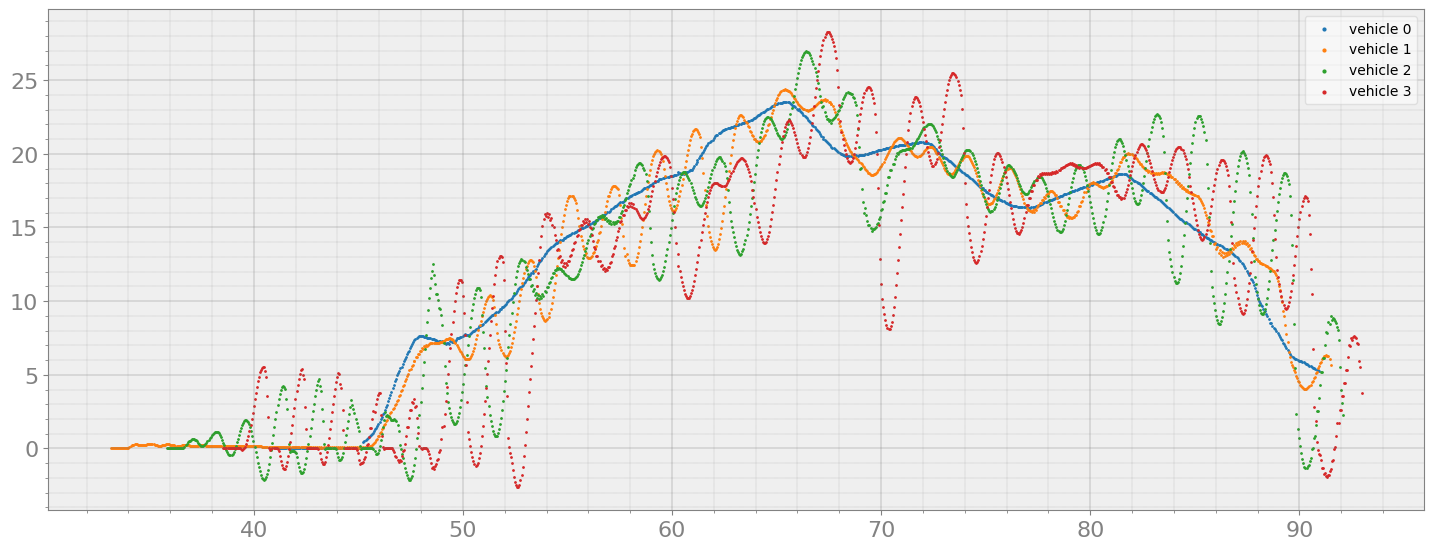

In [18]:
vel000_file = B.message_by_topic('/sparkle_000/vel')
vel001_file = B.message_by_topic('/sparkle_001/vel')
vel002_file = B.message_by_topic('/sparkle_002/vel')
vel003_file = B.message_by_topic('/sparkle_003/vel')

vel000 = pd.read_csv(vel000_file)
vel001 = pd.read_csv(vel001_file)
vel002 = pd.read_csv(vel002_file)
vel003 = pd.read_csv(vel003_file)

fig, ax = bagpy.create_fig(1)
ax[0].scatter(x = 'Time', y = 'linear.x', data = vel000, s = 1, label = 'vehicle 0')

ax[0].scatter(x = 'Time', y = 'linear.x', data = vel001, s = 1, label = 'vehicle 1')

ax[0].scatter(x = 'Time', y = 'linear.x', data = vel002, s = 1, label = 'vehicle 2')

ax[0].scatter(x = 'Time', y = 'linear.x', data = vel003, s = 1, label = 'vehicle 3')

ax[0].legend()
fig.show()

/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


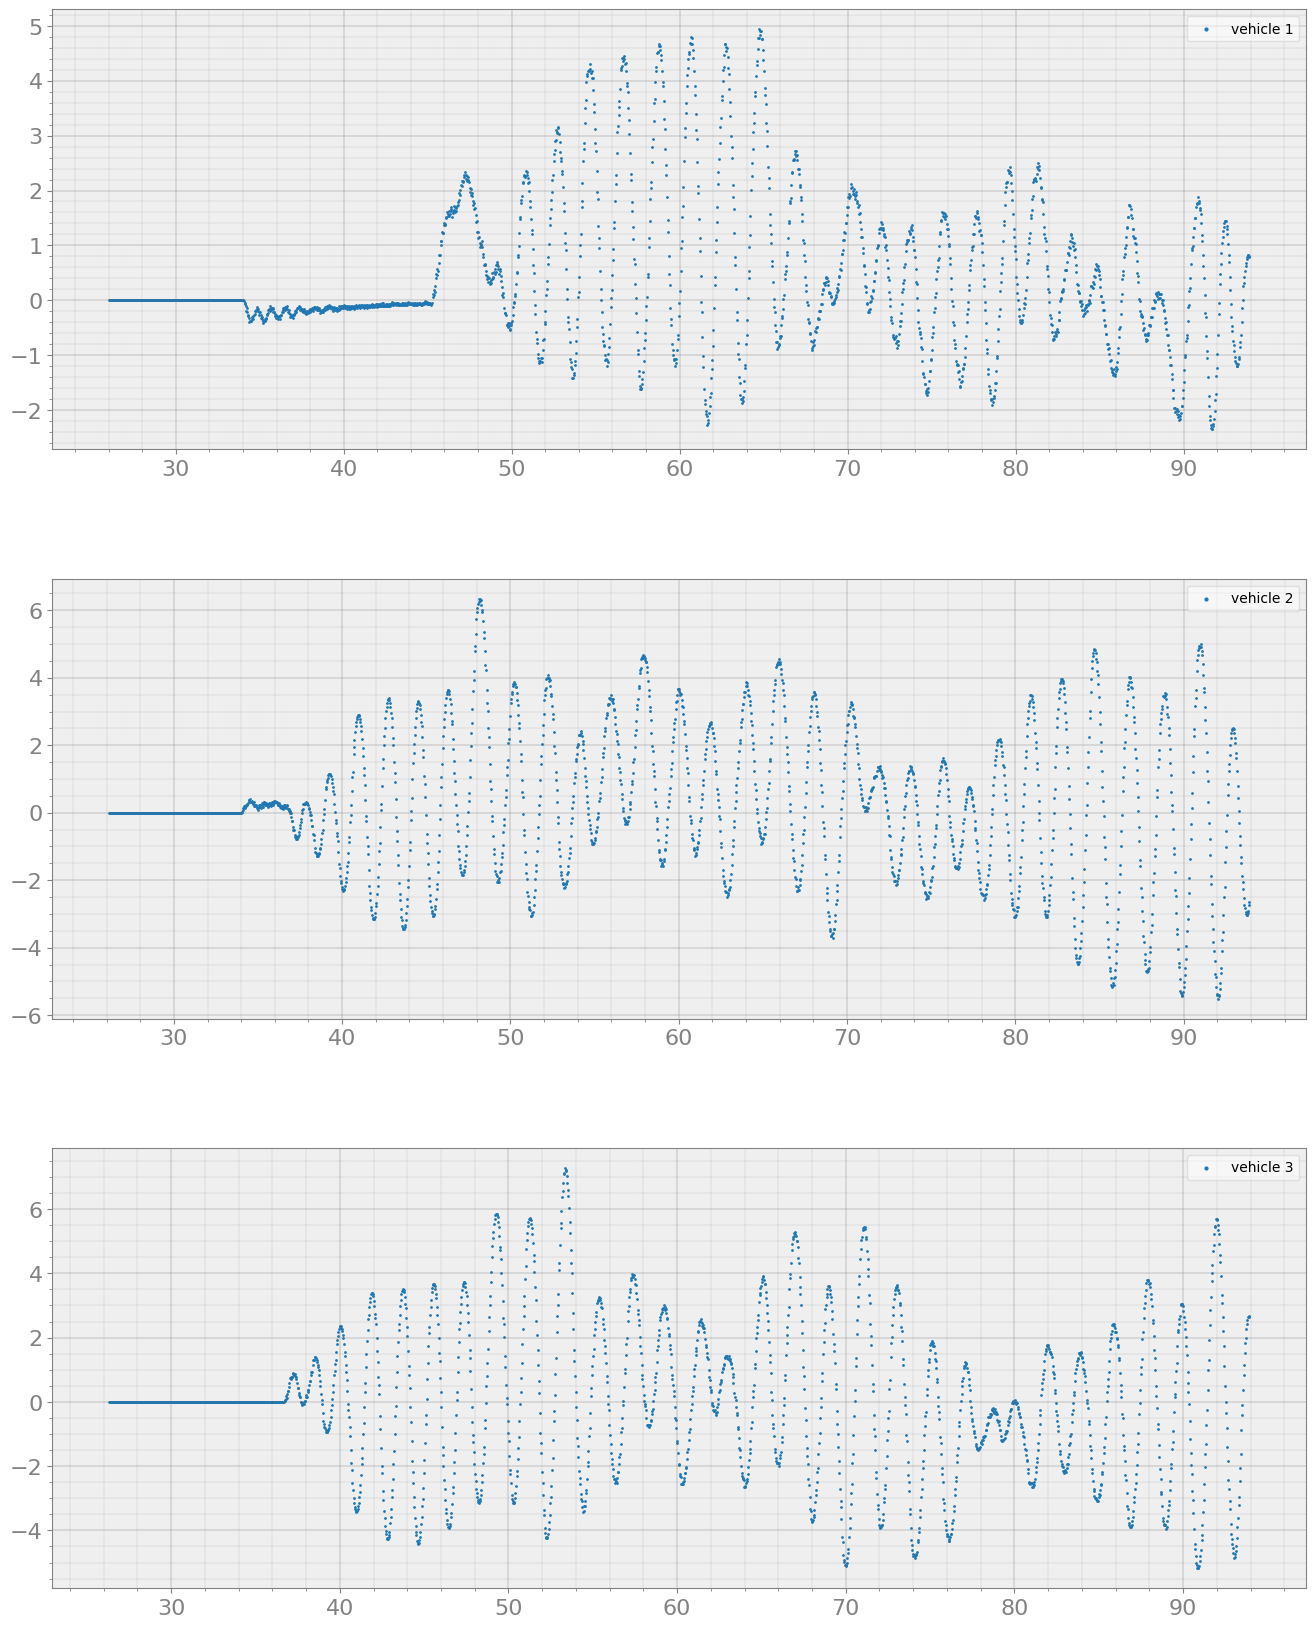

In [16]:
relvel000_file = B.message_by_topic('/sparkle_000/rel_vel')
relvel001_file = B.message_by_topic('/sparkle_001/rel_vel')
relvel002_file = B.message_by_topic('/sparkle_002/rel_vel')
relvel003_file = B.message_by_topic('/sparkle_003/rel_vel')

relvel000 = pd.read_csv(relvel000_file)
relvel001 = pd.read_csv(relvel001_file)
relvel002 = pd.read_csv(relvel002_file)
relvel003 = pd.read_csv(relvel003_file)

fig, ax = bagpy.create_fig(3)

ax[0].scatter(x = 'Time', y = 'linear.z', data = relvel001, s = 1, label = 'vehicle 1')

ax[1].scatter(x = 'Time', y = 'linear.z', data = relvel002, s = 1, label = 'vehicle 2')

ax[2].scatter(x = 'Time', y = 'linear.z', data = relvel003, s = 1, label = 'vehicle 3')

ax[0].legend()
ax[1].legend()
ax[2].legend()

fig.show()

/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


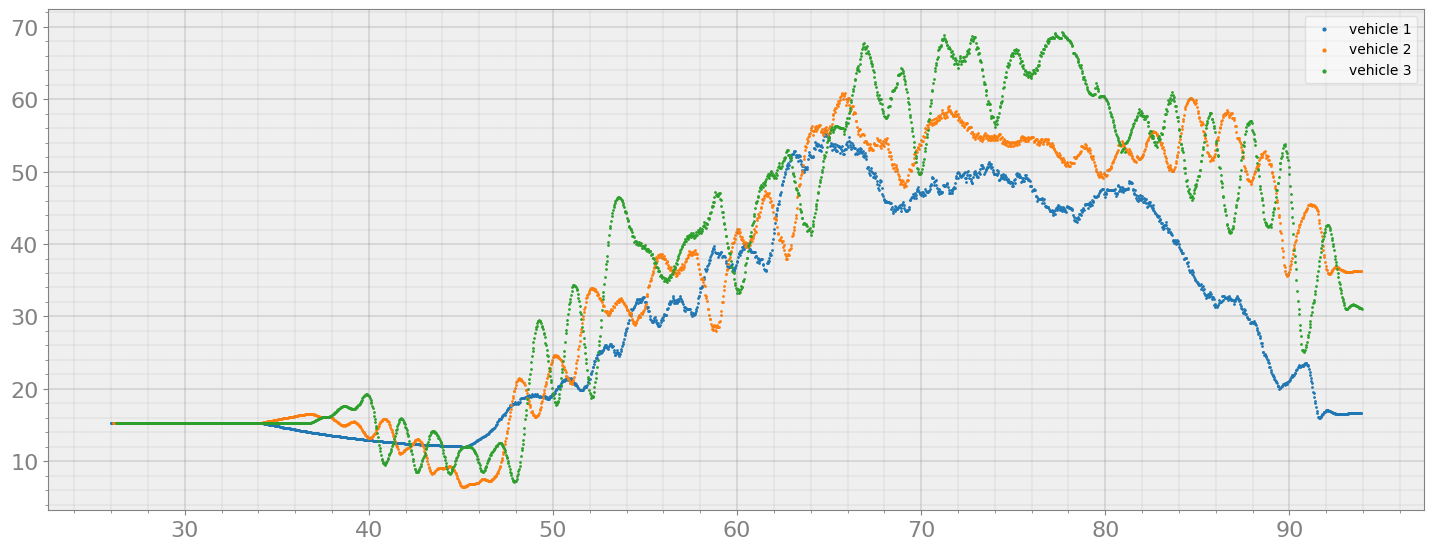

In [17]:
lead_dist001_file = B.message_by_topic('/sparkle_001/lead_dist')
lead_dist002_file = B.message_by_topic('/sparkle_002/lead_dist')
lead_dist003_file = B.message_by_topic('/sparkle_003/lead_dist')

lead_dist001 = pd.read_csv(lead_dist001_file)
lead_dist002 = pd.read_csv(lead_dist002_file)
lead_dist003 = pd.read_csv(lead_dist003_file)

fig, ax = bagpy.create_fig(1)

ax[0].scatter(x = 'Time', y = 'data', data = lead_dist001, s = 1, label = 'vehicle 1')

ax[0].scatter(x = 'Time', y = 'data', data = lead_dist002, s = 1, label = 'vehicle 2')

ax[0].scatter(x = 'Time', y = 'data', data = lead_dist003, s = 1, label = 'vehicle 3')

ax[0].legend()
fig.show()